<a href="https://colab.research.google.com/github/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2001%20-%20Euler%20Methods/101_Euler_method_with_Theorems_Growth_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Order Initial Value Problem
 

The more general form of a first order Ordinary Differential Equation is: 
$$
y^{'}=f(t,y).
$$
This can be solved analytically by integrating both sides but this is not straight forward for most problems.
Numerical methods can be used to approximate the solution at discrete points.


## Euler method

The simplest one step numerical method is the Euler Method named after the most prolific of mathematicians [Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler) (15 April 1707 – 18 September 1783) .

The general Euler formula for to the first order differential equation
$$ 
y^{'} = f(t,y), 
$$
approximates the derivative at time point $t_i$,
$$
y^{'}(t_i) \approx \frac{w_{i+1}-w_i}{t_{i+1}-t_{i}},
 $$
where $w_i$ is the approximate solution of $y$ at time $t_i$.
This substitution changes the differential equation  into a __difference__ equation of the form 
$$ 
\frac{w_{i+1}-w_i}{t_{i+1}-t_{i}}=f(t_i,w_i). 
$$
Assuming uniform stepsize $t_{i+1}-t_{i}$ is replaced by $h$, re-arranging the equation gives
$$ 
w_{i+1}=w_i+hf(t_i,w_i),
$$
 This can be read as the future $w_{i+1}$ can be approximated by the present $w_i$ and the addition of the input to the system $f(t,y)$ times the time step.


In [3]:
## Library
import numpy as np
import math 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")


## Population growth

The general form of the population growth differential equation is: 
$$ 
y^{'}=\epsilon y 
$$
where $\epsilon$ is the growth rate. The initial population at time $a$ is 
$$ 
y(a)=A,
 $$
$$
 a\leq t \leq b. 
 $$
Integrating gives  the general analytic (exact) solution: 
$$
 y=Ae^{\epsilon x}. 
 $$
We will use this equation to illustrate the application of the Euler method.
      
## Discrete Interval
The continuous time $a\leq t \leq b $ is discretised into $N$ points seperated by a constant stepsize
$$ 
h=\frac{b-a}{N}.
$$
Here the interval is $0\leq t \leq 2$ 
$$
 h=\frac{2-0}{20}=0.1,
 $$
this gives the 21 discrete points:
$$
 t_0=0, \ t_1=0.1, \ ... t_{20}=2. 
 $$
This is generalised to 
$$ 
t_i=0+i0.1, \ \ \ i=0,1,...,20.
$$
The plot below shows the discrete time steps.

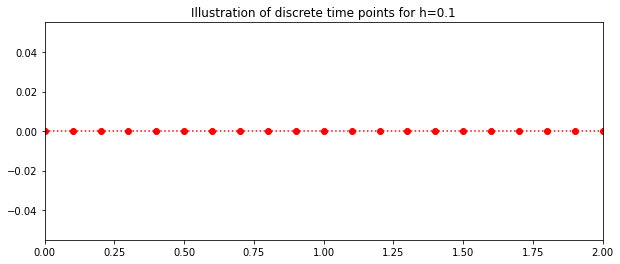

In [4]:
### Setting up time
t_end=2.0
t_start=0
N=20
h=(t_end-t_start)/(N)
time=np.arange(t_start,t_end+0.01,h)
fig = plt.figure(figsize=(10,4))
plt.plot(time,0*time,'o:',color='red')
plt.xlim((0,2))
plt.title('Illustration of discrete time points for h=%s'%(h))
plt.plot();

## Initial Condition
To get a specify solution to a first order initial value problem, an __initial condition__ is required.

For our population problem the intial condition is:
$$
y(0)=10.
$$
This gives the analytic solution
$$
y=10e^{\epsilon t}.
$$
### Growth rate 
Let the growth rate $$
\epsilon=0.5
$$ giving the analytic solution.
$$
y=10e^{0.5 t}.
$$
The plot below shows the exact solution on the discrete time steps.

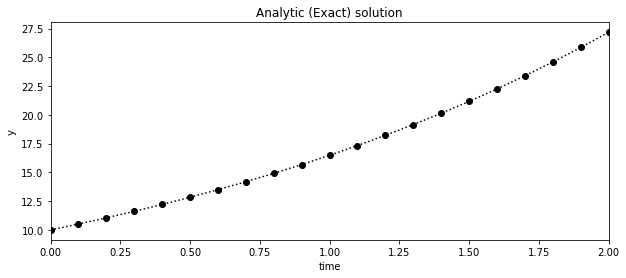

In [5]:
## Analytic Solution y
y=10*np.exp(0.5*time)

fig = plt.figure(figsize=(10,4))
plt.plot(time,y,'o:',color='black')
plt.xlim((0,2))
plt.xlabel('time')
plt.ylabel('y')
plt.title('Analytic (Exact) solution')
plt.plot();

## Numerical approximation of Population growth
The differential equation is transformed using the Euler method into a difference equation of the form
      $$ w_{i+1}=w_{i}+h \epsilon w_i. $$
This approximates a series of of values $w_0, \ w_1, \ ..., w_{N}$.
For the specific example of the population equation the difference equation is
      $$ w_{i+1}=w_{i}+h 0.5 w_i. $$
where $w_0=10$. From this initial condition the series is approximated.
The plot below shows the exact solution $y$ in black circles and Euler approximation $w$ in blue squares. 

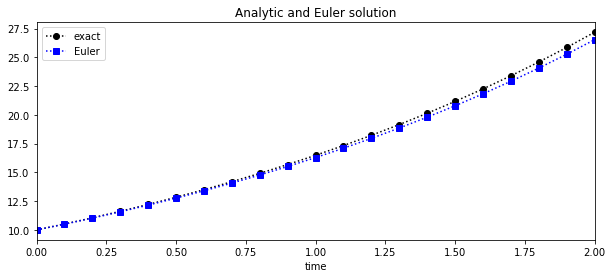

In [6]:
w=np.zeros(N+1)
w[0]=10
for i in range (0,N):
    w[i+1]=w[i]+h*(0.5)*w[i]

fig = plt.figure(figsize=(10,4))
plt.plot(time,y,'o:',color='black',label='exact')
plt.plot(time,w,'s:',color='blue',label='Euler')
plt.xlim((0,2))
plt.xlabel('time')
plt.legend(loc='best')
plt.title('Analytic and Euler solution')
plt.plot();

## Numerical Error
With a numerical solution there are two types of error: 
* local truncation error at one time step; 
* global error which is the propagation of local error. 

### Derivation of  Euler Local truncation error
The left hand side of a initial value problem $\frac{dy}{dt}$ is approximated by __Taylors theorem__ expand about a point $t_0$ giving:
\begin{equation}y(t_1) = y(t_0)+(t_1-t_0)y^{'}(t_0) + \frac{(t_1-t_0)^2}{2!}y^{''}(\xi), \ \ \ \ \ \ \xi \in [t_0,t_1]. \end{equation}
Rearranging and letting $h=t_1-t_0$ the equation becomes
$$y^{'}(t_0)=\frac{y(t_1)-y(t_0)}{h}-\frac{h}{2}y^{''}(\xi). $$
From this the local truncation error is
$$\tau y^{'}(t_0)\leq \frac{h}{2}M  $$
where $y^{''}(t) \leq M $.
#### Derivation of  Euler Local truncation error for the Population Growth
In most cases $y$ is unknown but in our example problem there is an exact solution which can be used to estimate the local truncation
$$y'(t)=5e^{0.5 t}$$
$$y''(t)=2.5e^{0.5 t}$$
From this a maximum upper limit can be calculated for $y^{''} $ on the interval $[t_0,t_1]=[0,0.1]$
$$y''(0.1)=2.5e^{0.1\times 0.5}=2.63=M$$
$$\tau=\frac{h}{2}2.63=0.1315 $$
The plot below shows the exact local truncation error $|y-w|$ (red triangle) and the upper limit of the Truncation error (black v) for the first two time points $t_0$ and $t_1$.

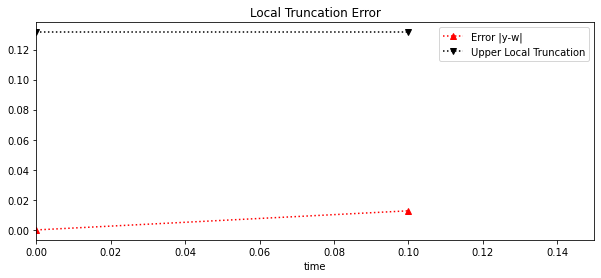

In [7]:
fig = plt.figure(figsize=(10,4))
plt.plot(time[0:2],np.abs(w[0:2]-y[0:2]),'^:'
         ,color='red',label='Error |y-w|')
plt.plot(time[0:2],0.1*2.63/2*np.ones(2),'v:'
         ,color='black',label='Upper Local Truncation')
plt.xlim((0,.15))
plt.xlabel('time')
plt.legend(loc='best')
plt.title('Local Truncation Error')
plt.plot();

## Global Error
The error does not stay constant accross the time this is illustrated in the figure below for the population growth equation. The actual error (red triangles) increases over time while the local truncation error (black v) remains constant.

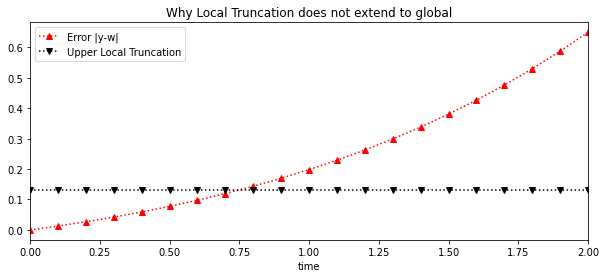

In [8]:
fig = plt.figure(figsize=(10,4))
plt.plot(time,np.abs(w-y),'^:'
         ,color='red',label='Error |y-w|')
plt.plot(time,0.1*2.63/2*np.ones(N+1),'v:'
         ,color='black',label='Upper Local Truncation')
plt.xlim((0,2))
plt.xlabel('time')
plt.legend(loc='best')
plt.title('Why Local Truncation does not extend to global')
plt.plot();

## Theorems
To theorem below proves an upper limit of the global truncation error.
### Euler Global Error
__Theorem Global Error__

Suppose $f$ is continuous and satisfies a Lipschitz Condition with constant
L on $D=\{(t,y)|a\leq t \leq b, -\infty < y < \infty \}$ and that a constant M
exists with the property that 
$$ |y^{''}(t)|\leq M. $$
Let $y(t)$ denote the unique solution of the Initial Value Problem
$$ y^{'}=f(t,y) \ \ \ a\leq t \leq b \ \ \ y(a)=\alpha $$
and $w_0,w_1,...,w_N$ be the approx generated by the Euler method for some
positive integer N.  Then for $i=0,1,...,N$
$$ |y(t_i)-w_i| \leq \frac{Mh}{2L}|e^{L(t_i-a)}-1|. $$

### Theorems about Ordinary Differential Equations
__Definition__

A function $f(t,y)$ is said to satisfy a __Lipschitz Condition__ in the variable $y$ on 
the set $D \subset R^2$ if a constant $L>0$ exist with the property that
$$ |f(t,y_1)-f(t,y_2)| < L|y_1-y_2| $$
whenever $(t,y_1),(t,y_2) \in D$.  The constant L is call the Lipschitz Condition
of $f$.

__Theorem__
Suppose $f(t,y)$ is defined on a convex set $D \subset R^2$. If a constant
$L>0$ exists with
$$ \left|\frac{\partial f(t,y)}{\partial y}\right|\leq L $$
then $f$ satisfies a Lipschitz Condition an $D$ in the variable $y$ with
Lipschitz constant L.


### Global truncation error for the population equation
For the population equation specific values $L$ and $M$ can be calculated.

In this case $f(t,y)=\epsilon y$ is continuous and satisfies a Lipschitz Condition with constant
$$ \left|\frac{\partial f(t,y)}{\partial y}\right|\leq L $$
$$ \left|\frac{\partial \epsilon y}{\partial y}\right|\leq \epsilon=0.5=L $$

on $D=\{(t,y)|0\leq t \leq 2, 10 < y < 30 \}$ and that a constant $M$
exists with the property that 
$$ |y^{''}(t)|\leq M. $$
$$ |y^{''}(t)|=2.5e^{0.5\times 2} \leq 2.5 e=6.8. $$

__Specific Theorem Global Error__

Let $y(t)$ denote the unique solution of the Initial Value Problem
$$ y^{'}=0.5 y \ \ \ 0\leq t \leq 10 \ \ \ y(0)=10 $$
and $w_0,w_1,...,w_N$ be the approx generated by the Euler method for some
positive integer N.  Then for $i=0,1,...,N$
$$ |y(t_i)-w_i| \leq \frac{6.8 h}{2\times 0.5}|e^{0.5(t_i-0)}-1| $$

The figure below shows the exact error $y-w$ in red triangles and the upper global error in black x's.

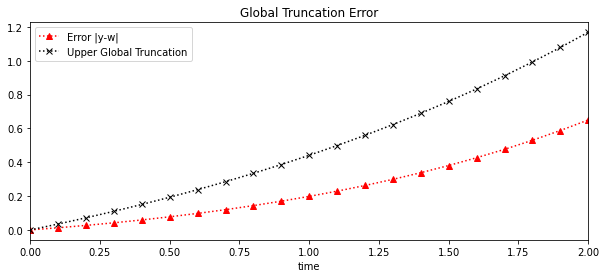

In [9]:
fig = plt.figure(figsize=(10,4))
plt.plot(time,np.abs(w-y),'^:'
         ,color='red',label='Error |y-w|')
plt.plot(time,0.1*6.8*(np.exp(0.5*time)-1),'x:'
         ,color='black',label='Upper Global Truncation')
plt.xlim((0,2))
plt.xlabel('time')
plt.legend(loc='best')
plt.title('Global Truncation Error')
plt.plot();

### Table
The table below shows the iteration $i$, the discrete time point t[i], the Euler approximation w[i] of the solution $y$, the exact error $|y-w|$ and the upper limit of the global error for the linear population equation.

In [14]:

d = {'time t_i': time[0:10],    'Euler (w_i) ':w[0:10],'Exact (y)':y[0:10],'Exact Error (|y_i-w_i|)':np.round(np.abs(w[0:10]-y[0:10]),10),r'Global Error ':np.round(0.1*6.8*(np.exp(0.5*time[0:10])-1),20)}
df = pd.DataFrame(data=d)
df

,time t_i,Euler (w_i),Exact (y),Exact Error (|y_i-w_i|),Global Error
0,0.0,10.000000,10.000000,0.000000,0.000000
1,0.1,10.500000,10.512711,0.012711,0.034864
2,0.2,11.025000,11.051709,0.026709,0.071516
3,0.3,11.576250,11.618342,0.042092,0.110047
4,0.4,12.155062,12.214028,0.058965,0.150554
5,0.5,12.762816,12.840254,0.077439,0.193137
6,0.6,13.400956,13.498588,0.097632,0.237904
7,0.7,14.071004,14.190675,0.119671,0.284966
8,0.8,14.774554,14.918247,0.143693,0.334441
9,0.9,15.513282,15.683122,0.169840,0.386452
